Project: Prediction mean values and exceeding limit days of fine Particulate Matter (PM2.5) in the air - Milan (Italy).

Student: **Alessandro Monolo** | 1790210

Lecturer: Jonas Moons

Fundamentals of Machine Learning - Master Data-Driven Design, Hogeschool Utrecht.

August 2021 - Block E

## Data cleaning and visualization of the weather and atmospheric phenomenon idata frame in Milan from 01.01.2014 to 31.12.2019

Import libraries which can may be useful:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def sprint_info(df):
    print('This is df shape: ', df.shape, '\n')
    print(df.info(), '\n')
    print('This is df: \n', df)

## Data Cleaning

In [6]:
# Import my complete dataset of the Milano's weather from January 14'to December 19':

In [7]:
df = pd.read_csv('milan_weather_2014_2019.csv')

In [8]:
# Transform the 'DatTime' column from object to dataTime, usinng the pandas function .to_datatime():

In [9]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [10]:
# Set the last column (DateTime) as first column of the dataset:

In [11]:
# First I create a list of my column names

In [12]:
cols = df.columns.tolist()

In [13]:
# From the just created list I switch the last one with the first one:

In [14]:
cols = cols[-1:] + cols[:-1]

In [15]:
# And finally I re-assign the column names to my dataframe:

In [16]:
df = df[cols]

In [17]:
df.head()

,DateTime,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm,FENOMENI
0,2014-01-01,2.0,-3.0,7.0,1.0,89.0,4.0,3.0,7.0,0.0,1020.0,0.0,0.0,pioggia nebbia
1,2014-01-02,3.0,3.0,4.0,3.0,99.0,4.0,6.0,11.0,0.0,1018.0,0.0,0.0,pioggia
2,2014-01-03,4.0,3.0,5.0,4.0,96.0,4.0,8.0,11.0,0.0,1021.0,0.0,0.0,pioggia
3,2014-01-04,5.0,4.0,5.0,5.0,99.0,4.0,6.0,13.0,0.0,1015.0,0.0,0.0,pioggia nebbia
4,2014-01-05,6.0,4.0,9.0,6.0,98.0,7.0,6.0,13.0,0.0,1007.0,0.0,0.0,pioggia nebbia


The columns here above are now dropped from the dataframe since many of the values are missing or all the values are equals to 0:

- **PIOGGIA mm (Rain level in mm);**
- **PRESSIONEMEDIA mb (Air Pressure in mb);**
- **RAFFICA km/h (Wind gust in km/h);**

Since my model needs mean daily values, the following columns will be dropped as well from the dataframe as they report maximum or minimum values:

- **TMIN °C (Minimal Temperature in °C);**
- **TMAX °C (Maximal Temperature in °C);**
- **VENTOMAX km/h (Max Wind speed in km/h);**

And finally I will drop as well the following columns being not related to my research:
- **PUNTORUGIADA °C (Dew point temperature in °C);**
- **VISIBILITA km (Visibility in km).**

In [18]:
df.drop(['TMIN °C', 'TMAX °C', 'PUNTORUGIADA °C', 'VISIBILITA km', 'VENTOMAX km/h', 'RAFFICA km/h', 'PRESSIONEMEDIA mb', 'PIOGGIA mm'], axis=1, inplace=True)

In [19]:
# Here I rename the columns for better understanding:

In [20]:
df.rename(columns={"TMEDIA °C": "Mean_Temperature_°C", "UMIDITA %": "Humidity_Level_%", "VENTOMEDIA km/h": "Mean_Windspeed_km/h", "PRESSIONESLM mb": "ATM_Pressure", "FENOMENI": "ATM_Phenomena"}, inplace=True)

In [21]:
df.head()

,DateTime,Mean_Temperature_°C,Humidity_Level_%,Mean_Windspeed_km/h,ATM_Pressure,ATM_Phenomena
0,2014-01-01,2.0,89.0,3.0,1020.0,pioggia nebbia
1,2014-01-02,3.0,99.0,6.0,1018.0,pioggia
2,2014-01-03,4.0,96.0,8.0,1021.0,pioggia
3,2014-01-04,5.0,99.0,6.0,1015.0,pioggia nebbia
4,2014-01-05,6.0,98.0,6.0,1007.0,pioggia nebbia


In [22]:
# Now I need to convert from NaN value to None string the missing values of the 'ATM_Phenomena' column,
# Since the next step is to create new column if the word 'nord' is present: 

In [23]:
df['ATM_Phenomena'] = df['ATM_Phenomena'].astype(object).replace(np.nan, 'none')

In [24]:
# As both thunderstorm (temporale) and hail (grandine) are considered as rainy (pioggia) atmospheric events,
# I replace the string 'temporale' and 'grandine' with 'pioggia' to have a new rain column including all three atmospheric
# events:

In [25]:
df['ATM_Phenomena'] = df['ATM_Phenomena'].str.replace('temporale','pioggia')
df['ATM_Phenomena'] = df['ATM_Phenomena'].str.replace('grandine','pioggia')

In [26]:
# Now I set a function where if the word indicated as parameter is presente per each row of the df,
# will be assigned a boolean values (integerin this case)

In [27]:
def add_phenomena(phenomena):
    df[phenomena] = df["ATM_Phenomena"].str.contains(phenomena).astype(int)
    return df

After having set the here above function, I will use it to create three new data frame columns based on
the presence of certain word per each row of the df.

The three words are: nebbia (fog), neve (snow), pioggia (rain),
which are all atmospheric phenomenon which can may affect the level of pollution in the air, (Carugno M. et al., 2016)

In [28]:
add_phenomena('nebbia')
add_phenomena('neve')
add_phenomena('pioggia')

,DateTime,Mean_Temperature_°C,Humidity_Level_%,Mean_Windspeed_km/h,ATM_Pressure,ATM_Phenomena,nebbia,neve,pioggia
0,2014-01-01,2.0,89.0,3.0,1020.0,pioggia nebbia,1,0,1
1,2014-01-02,3.0,99.0,6.0,1018.0,pioggia,0,0,1
2,2014-01-03,4.0,96.0,8.0,1021.0,pioggia,0,0,1
3,2014-01-04,5.0,99.0,6.0,1015.0,pioggia nebbia,1,0,1
4,2014-01-05,6.0,98.0,6.0,1007.0,pioggia nebbia,1,0,1
...,...,...,...,...,...,...,...,...,...
2186,2019-12-27,3.0,85.0,4.0,1023.0,nebbia,1,0,0
2187,2019-12-28,3.0,87.0,3.0,1030.0,nebbia,1,0,0
2188,2019-12-29,2.0,97.0,4.0,1034.0,nebbia,1,0,0
2189,2019-12-30,4.0,86.0,7.0,1036.0,none,0,0,0


In [29]:
df['ATM_Phenomena'].value_counts()

none                       949
pioggia                    430
nebbia                     420
pioggia pioggia            218
pioggia nebbia             132
pioggia pioggia nebbia      14
pioggia neve                13
pioggia neve nebbia          7
neve nebbia                  4
neve                         4
Name: ATM_Phenomena, dtype: int64

In [30]:
# I will now drop the ATM_Phenomena being not usefull anymore, having already obtained the new three data frame columns
# I needed:

In [31]:
df.drop('ATM_Phenomena', axis=1, inplace=True)

In [32]:
# Rename for a more comprehensive understanding the new data frame columns:

In [33]:
df.rename(columns={"nebbia": "ATM_Phenom_Fog", "neve": "ATM_Phenom_Snow", "pioggia": "ATM_Phenom_Rain"}, inplace=True)

A good air ventilation helps to keep clean the air and reduce the concentration level of particulate matter 2.5, as well as the level of humidity which plays an important role as well, being like a gloe for the fine dust which are kept on the low level of the atmosphere having an increased weight, (Cheng et al., 2015).

In [34]:
# For this reason I create now a new data frame column based on two statements which have both a high
# level of humidity as well as a low mean wind speed.

In [35]:
conditions = [(df['Mean_Windspeed_km/h'] <= 5.0) & (df['Humidity_Level_%'] >= 90.0)]

In [36]:
# Create a list of the values we want to assign for each condition

In [37]:
values = [1]

In [38]:
# Create a new column and use np.select to assign values to it using our lists as arguments

In [39]:
df['ATM_Phenom_Sultriness'] = np.select(conditions, values)

In [40]:
# Add three new columns based on the day of the week, month and season.
# Since these three new parameters can be correlated to the atmospheric phenomenon present already within this datet
# and therefore it is necessary now to include them too:

In [41]:
# To get the days of the week I use here the lambda function applied to the DateTime column of my dataframe:

In [42]:
df["Day_of_Week"] = df["DateTime"].apply(lambda time: time.dayofweek)

In [43]:
# While here in order to get each season from the DateTime column I previously create a list of equivalent numbers,
# and then I apply to a range of integers within a new dictionary the seasons list:

In [44]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season 

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [45]:
# Finally I apply the datetime function using as map parameter the dictionary created before:

In [46]:
df['Season'] = df.DateTime.dt.month.map(month_to_season)

## Data Exploration:

### The following pie charts represent the total amount of days with atmospheric phenomenon (Sultriness & low ventilation, Snow, Rain, fog) out of total days from January 2014 to December 2019:

- **Sultry Days**

In [47]:
sultrydays = df['ATM_Phenom_Sultriness'].value_counts().reset_index(name= "Sultriness")
print('Number of days from 2014 to 2019 with low ventilation and high humidity: \n', sultrydays)

percentage_sultrydays = df['ATM_Phenom_Sultriness'].value_counts(normalize=True).mul(100).round(decimals=2).astype(str)+'%'
print('Percentage of days from 2014 to 2019 with low ventilation and high humidity: \n', percentage_sultrydays.reset_index(name= "Percentage"))

Number of days from 2014 to 2019 with low ventilation and high humidity: 
    index  Sultriness
0      0        2022
1      1         169
Percentage of days from 2014 to 2019 with low ventilation and high humidity: 
    index Percentage
0      0     92.29%
1      1      7.71%


Text(0.5, 1.0, 'Percentage of sultry days with low natural ventilation, fron 2014 to 2019')

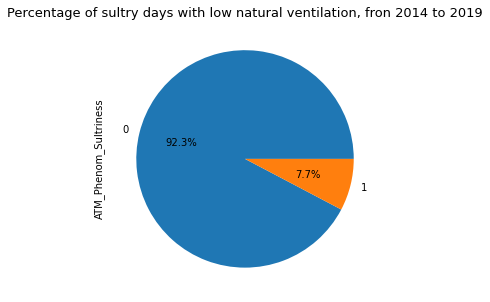

In [48]:
plt.figure(figsize=(5,5))
df['ATM_Phenom_Sultriness'].value_counts(normalize=True).mul(100).round(decimals=2).plot.pie(autopct="%.1f%%")
plt.title('Percentage of sultry days with low natural ventilation, fron 2014 to 2019', size=13)

- #### Snowy Days

In [49]:
snowydays = df['ATM_Phenom_Snow'].value_counts().reset_index(name= "Snow")
print('Number of days from 2014 and 2019 with snow athmospheric phenomena: \n', snowydays)

percentage_snowydays = df['ATM_Phenom_Snow'].value_counts(normalize=True).mul(100).round(decimals=1).astype(str)+'%'
print('Percentage of days from 2014 and 2019 with snow athmospheric phenomena: \n', percentage_snowydays.reset_index(name= "Percentage"))

Number of days from 2014 and 2019 with snow athmospheric phenomena: 
    index  Snow
0      0  2163
1      1    28
Percentage of days from 2014 and 2019 with snow athmospheric phenomena: 
    index Percentage
0      0      98.7%
1      1       1.3%


Text(0.5, 1.0, 'Percentage of snowy days, from 2014 to 2019')

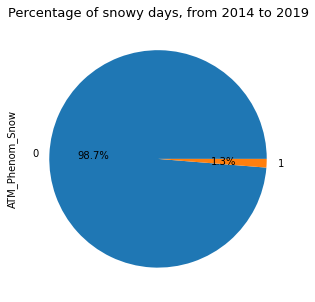

In [50]:
plt.figure(figsize=(5,5))
df['ATM_Phenom_Snow'].value_counts(normalize=True).mul(100).round(decimals=2).plot.pie(autopct="%.1f%%")
plt.title('Percentage of snowy days, from 2014 to 2019', size=13)

- #### Rainy Days

In [51]:
rainydays = df['ATM_Phenom_Rain'].value_counts().reset_index(name= "Rain")
print('Number of days from 2014 and 2019 with rain athmospheric phenomena: \n', rainydays)

percentage_rainydays = df['ATM_Phenom_Rain'].value_counts(normalize=True).mul(100).round(decimals=1).astype(str)+'%'
print('Percentage of days from 2014 and 2019 with rain athmospheric phenomena: \n', percentage_rainydays.reset_index(name= "Percentage"))

Number of days from 2014 and 2019 with rain athmospheric phenomena: 
    index  Rain
0      0  1377
1      1   814
Percentage of days from 2014 and 2019 with rain athmospheric phenomena: 
    index Percentage
0      0      62.8%
1      1      37.2%


Text(0.5, 1.0, 'Percentage of rainy days, from 2014 to 2019')

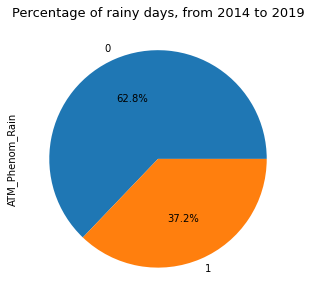

In [52]:
plt.figure(figsize=(5,5))
df['ATM_Phenom_Rain'].value_counts(normalize=True).mul(100).round(decimals=2).plot.pie(autopct="%.1f%%")
plt.title('Percentage of rainy days, from 2014 to 2019', size=13)

- #### Foggy Days

In [53]:
foggydays = df['ATM_Phenom_Fog'].value_counts().reset_index(name= "Fog")
print('Number of days from 2014 and 2019 with fog athmospheric phenomena: \n', rainydays)

percentage_rainydays = df['ATM_Phenom_Fog'].value_counts(normalize=True).mul(100).round(decimals=1).astype(str)+'%'
print('Percentage of days from 2014 and 2019 with rain athmospheric phenomena: \n', percentage_rainydays.reset_index(name= "Percentage"))

Number of days from 2014 and 2019 with fog athmospheric phenomena: 
    index  Rain
0      0  1377
1      1   814
Percentage of days from 2014 and 2019 with rain athmospheric phenomena: 
    index Percentage
0      0      73.7%
1      1      26.3%


Text(0.5, 1.0, 'Percentage of foggy days, from 2014 to 2019')

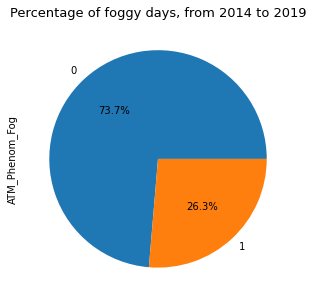

In [54]:
plt.figure(figsize=(5,5))
df['ATM_Phenom_Fog'].value_counts(normalize=True).mul(100).round(decimals=2).plot.pie(autopct="%.1f%%")
plt.title('Percentage of foggy days, from 2014 to 2019', size=13)

#### Conclusion:

In Milan, one day out of four we can assist at the fog as atmospheric phenomenon.


37% of days are charaterized by rain as atmospheric phenomenon and finally only 1% of days are charaterized by snow as atmospheric phenomenon.


Saltry days with low ventilation are almost 8%.

## Data Visualization

### 1 - Daily Mean temperature in °C in Milan from 2014 and 2019

In [55]:
mean_temperature = df['Mean_Temperature_°C'].mean()
median_temperature = df['Mean_Temperature_°C'].median()

lowest = df['Mean_Temperature_°C'].nsmallest(1)
highest = df['Mean_Temperature_°C'].nlargest(1)

In [56]:
print('The Min temperature registered is: ', float(lowest), '°C.')
print('The Max temperature registered is: ', float(highest), '°C.')

print('The Mean temperature in Milano from 2014 and 2019 was: ', float(mean_temperature), '°C.')
print('The Median temperature in Milano from 2014 and 2019 was: ', float(median_temperature), '°C.')

The Min temperature registered is:  -3.0 °C.
The Max temperature registered is:  31.0 °C.
The Mean temperature in Milano from 2014 and 2019 was:  14.744622425629291 °C.
The Median temperature in Milano from 2014 and 2019 was:  15.0 °C.


In [57]:
# Distribution of °C as daily mean temperature from the year 2014 and 2019, including the mean and medium temperature:

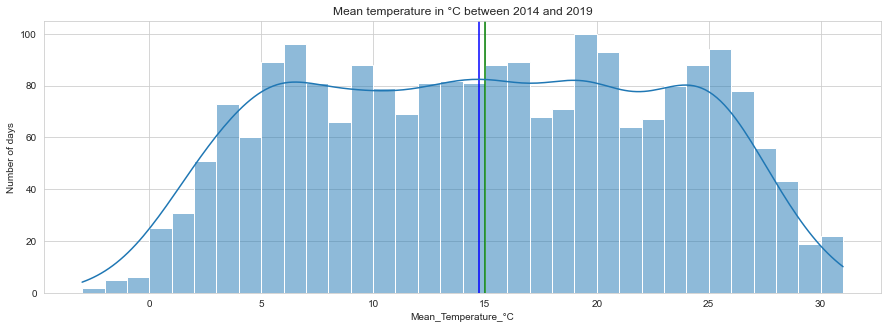

In [58]:
sns.set_style('whitegrid') # Set the visualization style
mean_daily_temperature = df['Mean_Temperature_°C'].dropna() # Eliminate all the NaN values present inside the weight variable
plt.figure(figsize=(15,5)) # Set the dimension of the figure to be plotted

plt.axvline(mean_temperature, 0, 100, color='blue', label='mean') # This adds a vertical line at x-position mean size
plt.axvline(median_temperature, 0, 100, color='green', label='median') # This adds a vertical line at x-position median_size

sns.histplot(mean_daily_temperature, kde=True, bins=34) # Set the distribution figure, augmenting the amount of bins and showing th KDE line
plt.title('Mean temperature in °C between 2014 and 2019') # Set the title of the figure
plt.ylabel('Number of days') # Set the y label of the figure
df['Mean_Temperature_°C'].name = 'Temperature in °C' # Set the x axes name

plt.savefig('Distribution of °C as daily mean temperature from the year 2014 and 2019.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)

plt.show() # Show the figure here below

**Conclusion:**

This histplot shows as the daily mean temperatures in °C in Milano from 2014 nd 2019 are between -3 and +31 degrees.
Furthermore, the mean and median values are very close to each other, where the first is equal to 14.7 and the second to 15 degrees.
The distribution of the daily values is modal.

### 2 -  Daily mean humidity level in % in Milan from 2014 and 2019

In [59]:
mean_humidity = df['Humidity_Level_%'].mean()
median_humidity = df['Humidity_Level_%'].median()

lowest_humidity = df['Humidity_Level_%'].nsmallest(1)
highest_humidity = df['Humidity_Level_%'].nlargest(1)

In [60]:
print('The Min humidity level registered is: ', float(lowest_humidity), '%.')
print('The Max humidity level registered is: ', float(highest_humidity), '%.')

print('The Mean humidity level in Milan from 2014 and 2019 was: ', float(mean_humidity), '%.')
print('The mode humidity value in Milan from 2014 and 2019 was: ', float(median_humidity), '%.')

The Min humidity level registered is:  17.0 %.
The Max humidity level registered is:  100.0 %.
The Mean humidity level in Milan from 2014 and 2019 was:  71.8274599542334 %.
The mode humidity value in Milan from 2014 and 2019 was:  72.0 %.


In [61]:
# Distribution of % as daily mean humidity level from the year 2014 and 2019, including the mean and medium value lines:

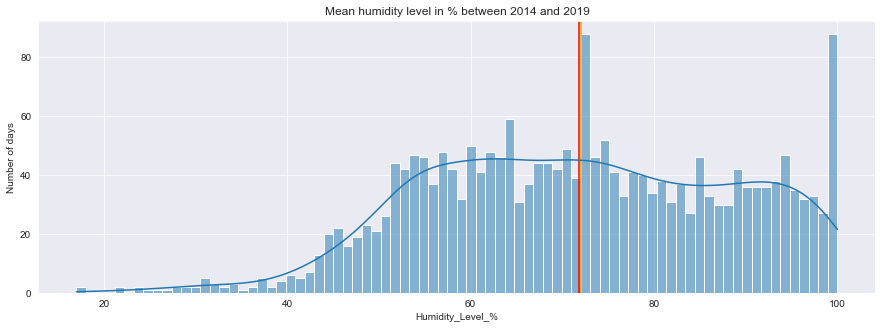

In [62]:
sns.set_style('darkgrid')                                 # Set the visualization style
mean_daily_humidity = df['Humidity_Level_%'].dropna() # Eliminate all the NaN values present inside the weight variable
plt.figure(figsize=(15,5))                            # Set the dimension of the figure to be plotted

plt.axvline(mean_humidity, 0, 100, color='red', label='mean') # This adds a vertical line at x-position mean size
plt.axvline(median_humidity, 0, 100, color='orange', label='mode') # This adds a vertical line at x-position median_size

sns.histplot(mean_daily_humidity, kde=True, bins=80) # Set the distribution figure, augmenting the amount of bins and showing th KDE line
plt.title('Mean humidity level in % between 2014 and 2019') # Set the title of the figure
plt.ylabel('Number of days') # Set the y label of the figure
df['Humidity_Level_%'].name = 'Humidity Level in %' # Set the x axes name

plt.savefig('Distribution of % as daily mean humidity level from the year 2014 and 2019.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)
plt.show() # Show the figure here below

**Conclusion:**

The daily mean values are not equally distributed, I can see a long skew to the left.
Furthermore, the mean and median values match one of the two main peaks, equivalent to 73%.

### 3 - Daily mean wind speed in km/h per season in Milan from 2014 and 2019

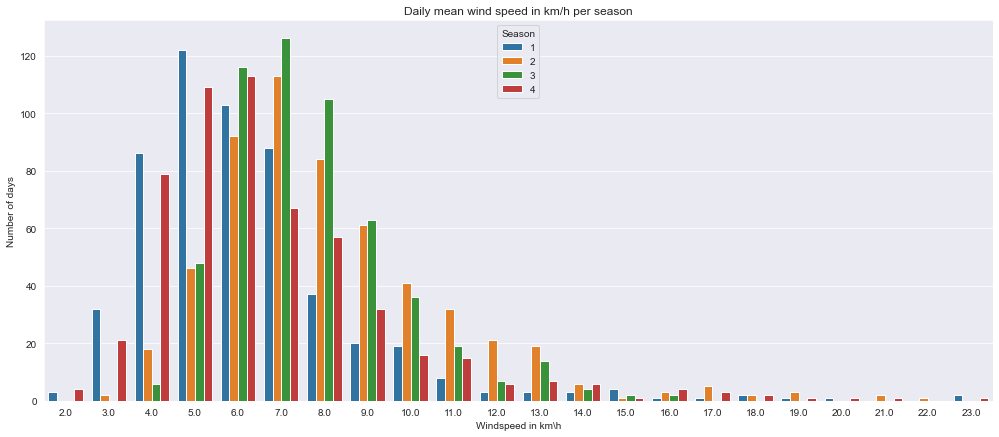

In [63]:
plt.figure(figsize=(17,7))
sns.set_style('darkgrid')
sns.countplot(data=df, x='Mean_Windspeed_km/h', hue='Season')
plt.title('Daily mean wind speed in km/h per season')
plt.xlabel('Windspeed in km\h')
plt.ylabel('Number of days')

plt.savefig('Daily mean wind speed in km h per season.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)
plt.show()

**Conclusion:**

Natural ventilation in Milan is equally distributed among all the seasons of the year, with the wind speed generally ranging from 4 to 9 km/h.

Thus, Milan is not hit by intense wind during the year timeline, but rather characterized by a constant breeze.

### 4 - Humidity level in % per season during foggy days

<Figure size 1080x1080 with 0 Axes>

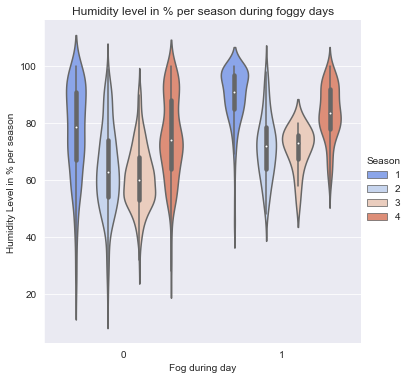

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,15))
sns.catplot(x='ATM_Phenom_Fog', y='Humidity_Level_%', data=df, hue='Season', palette='coolwarm', kind='violin')
plt.title('Humidity level in % per season during foggy days')
plt.xlabel('Fog during day')
plt.ylabel('Humidity Level in % per season')

plt.savefig('Humidity level in % per season during foggy days.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)
plt.show()

**Conclusion:**

Days characterized by fog as an atmospheric phenomenon tend to have a higher percentage of humidity than others.

Apparently, in both cases, the percentage of humidity is lower in winter (1).

While the least humid season turns out to be spring (2).

### 5 - Distribution of rainy days among daily mean humidity levels versus atmospheric pressure levels

**ATM_Pressure column data cleaning, remove outliers.**

In [65]:
# After plotting a visualization of ATM pressure versus the humidity level in % and discovering some
# values of the humidity level column were below 25%, those have been dropped by using .mask and .between functions
# and replacing them with NaN values in order to eliminate any outliers.

In [66]:
df["ATM_Pressure"].mask(df["ATM_Pressure"].between(0, 100), inplace=True)

In [67]:
df["Humidity_Level_%"].mask(df["Humidity_Level_%"].between(0, 25), inplace=True)

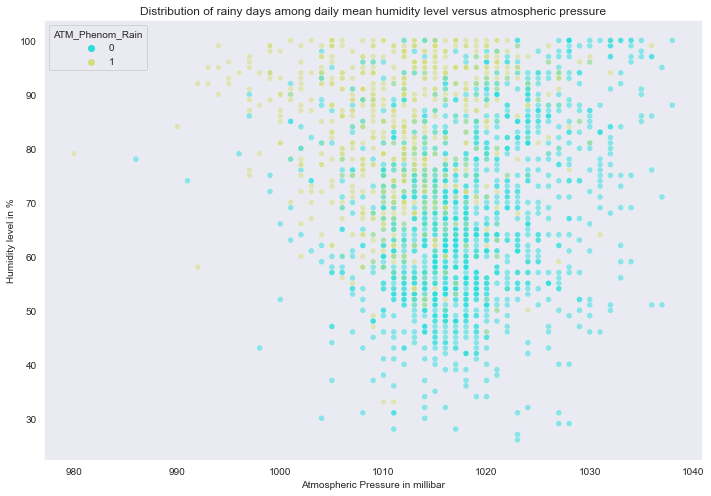

In [68]:
plt.figure(figsize=(10,7))
sns.set_style('dark')
sns.scatterplot(x='ATM_Pressure', y='Humidity_Level_%', data=df, hue='ATM_Phenom_Rain', palette='rainbow', alpha=0.5)
plt.title('Distribution of rainy days among daily mean humidity level versus atmospheric pressure')
plt.xlabel('Atmospheric Pressure in millibar')
plt.ylabel('Humidity level in %')
plt.tight_layout()

plt.savefig('Daily mean humidity level versus atmospheric pressure for rainy days.jpg', dpi=1900, facecolor='w', format='jpg', optimize=True)
plt.show()

**Conclusion:**

There appears to be a partial split between rainy and rainless days.

The days with rain in fact have an atmospheric pressure in mb lower than those without rain phenomena.

Furthermore, as expected, the level of humidity present in the air is higher on rainy days than those where showers were absent during the day.

### 6 - Visualization of NaN missing values from each columns of df dataframe

In [69]:
# Check any missing values along my dataframe:

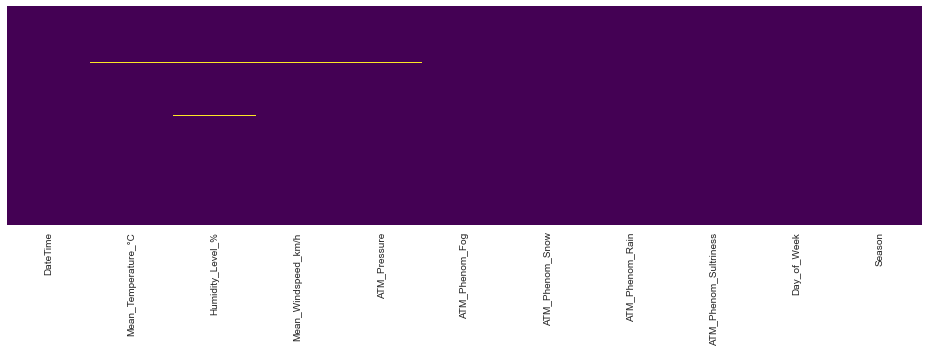

In [70]:
plt.figure(figsize=(13,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()
plt.show()

Last check before saving and then **saving the df dataframe to csv file**,

ready to be **merged with the second dataframe** regarding **harmful elements in the air** in Milan, January 2014 / December 2019.

In [71]:
#sprint_info(df)

## Saving the Weather Dataframe to a CSV file

In [72]:
df.to_csv("Milan_Final_Weather_2014_2019.csv", index=False)

In [73]:
Milan_Final_Weather_2014_2019 = pd.read_csv("Milan_Final_Weather_2014_2019.csv")

In [74]:
#Milan_Final_Weather_2014_2019.describe()

In [75]:
#sprint_info(Milan_Final_Weather_2014_2019)

## Bibliography

- Carugno, M., Consonni, D., Randi, G., Catelan, D., Grisotto, L., Bertazzi, P. A., Biggeri, A., & Baccini, M. (2016). Air pollution exposure, cause-specific deaths and hospitalizations in a highly polluted Italian region. Environmental Research, 147, 415–424.


- Cheng, Y., He, K. B., Du, Z. Y., Zheng, M., Duan, F. K., & Ma, Y. L. (2015). Humidity plays an important role in the PM 2.5 pollution in Beijing. Environmental Pollution, 197, 68–75.